# Exploratory Analysis of San Diego County TMDL Measurements

This dataset, which contains multiple TDML measurement series, was extracted from CEDEN, and is stored in the [Data Library data repository](https://data.sandiegodata.org/dataset/water-quality-project-example-data/resource/4d8d1b40-a70f-450b-b1a2-2f7571643cbb). More information about the dataset is avialble at the [program overview website.](https://www.waterboards.ca.gov/sandiego/water_issues/programs/tmdls/).

The largest number of records are for Rainbow Creek, which [has had a long term monitoring and remediation project.](http://missionrcd.org/residential/rainbow-creek-watershed/)


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('http://ds.civicknowledge.org.s3.amazonaws.com/ceden.waterboards.ca.gov/CEDEN%20TDML.csv', 
                 skiprows=2, low_memory=False)




In [34]:
df['SampleDate'] = pd.to_datetime(df.SampleDate) # Dates are often not automatically convered
df['Result'] = pd.to_numeric(df['Result'],errors='coerce') # Column has some non-numerics, so is recognized as a string

In [4]:
df.head().T

,0,1,2,3,4
Program,Total Maximum Daily Load,Total Maximum Daily Load,Total Maximum Daily Load,Total Maximum Daily Load,Total Maximum Daily Load
ParentProject,Bacteria TMDL 20 Beaches and Creeks,Bacteria TMDL 20 Beaches and Creeks,Bacteria TMDL 20 Beaches and Creeks,Bacteria TMDL 20 Beaches and Creeks,Bacteria TMDL 20 Beaches and Creeks
Project,Chollas Creek Bacteria TMDL,Chollas Creek Bacteria TMDL,Chollas Creek Bacteria TMDL,Chollas Creek Bacteria TMDL,Chollas Creek Bacteria TMDL
StationName,Chollas Creek North Fork MLS,Chollas Creek North Fork MLS,Chollas Creek North Fork MLS,Chollas Creek North Fork MLS,Chollas Creek North Fork MLS
StationCode,SD8(1),SD8(1),SD8(1),SD8(1),SD8(1)
SampleDate,2015-10-20 00:00:00,2015-10-20 00:00:00,2015-11-04 00:00:00,2015-11-04 00:00:00,2015-12-29 00:00:00
CollectionTime,11:08:00,11:08:00,11:45:00,11:45:00,10:05:00
LocationCode,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded
CollectionDepth,-88,-88,-88,-88,-88
UnitCollectionDepth,m,m,m,m,m


In [5]:
# Names of all of the parent projects
df.ParentProject.value_counts()

Nutrient TMDL for Santa Margarita Watershed       23554
Bacteria TMDL 20 Beaches and Creeks                7076
Revised TMDL for Indicator Bacteria, Project 1     1401
Shelter Island Copper TMDL                          333
City of Escondido Dry Weather Special Study          96
Name: ParentProject, dtype: int64

In [72]:
df.Project.value_counts()

Nutrient TMDL for Santa Margarita Watershed          23204
City of San Diego Bacteria TMDL                       4826
San Diego River Bacteria TMDL Monitoring Program      1222
Chollas Creek Jurisdictional Boundry SS                792
Chollas Creek Bacteria TMDL                            547
MS4 Outfall Monitoring Rainbow Creek Subwatershed      350
Los Penasquitos Bacteria TMDL                          337
Shelter Island Copper TMDL                             333
San Dieguito Bacteria TMDL                             332
Moonlight Beach Bacterial TMDL                         242
San Luis River Bacteria TMDL Monitoring Program        179
City of Escondido Dry Weather Special Study 2016        96
Name: Project, dtype: int64

In [6]:
# Identifiers for the various measurements
df.Analyte.value_counts()

pH                                     2687
Temperature                            2687
Turbidity, Total                       2652
SpecificConductivity, Total            1785
Oxygen, Dissolved, Total               1706
Velocity                               1577
Salinity, Total                        1508
Ammonia as N, Total                    1442
Nitrogen, Total Kjeldahl, Total        1442
Phosphorus as P, Total                 1442
Nitrate as N, Total                    1434
Nitrite as N, Total                    1432
OrthoPhosphate as P, Total             1432
Total Dissolved Solids, Total          1408
Enterococcus                           1352
Coliform, Fecal                        1348
Coliform, Total                         983
SpecificConductivity, Not Recorded      901
Sulfate, Total                          754
Oxygen, Dissolved, Not Recorded         745
Iron, Total                             717
E. coli                                 479
Discharge                       

# Records Per Stations

The largest number of records are for Rainbow Creek, which [has had a long term monitoring and remediation project.](http://missionrcd.org/residential/rainbow-creek-watershed/)


In [7]:
df.StationName.value_counts().head(20)

Rainbow Creek @ Stage Coach Lane                     2295
Rainbow Creek @ Willow Glen Road                     2212
Rainbow Creek @ Huffstatler St.                      2111
Rainbow Creek @ Old Highway 395                      2088
Rainbow Creek @ 2219 Willow Glen Road                2072
Willow Glen Tributary @ Willow Glen Road             2030
Rainbow Glen Tributary to Rainbow Creek              1876
Rainbow Creek @ MWD Road Crossing                    1835
Chica tributary @ 1st Street                         1588
Brow Ditch to Rainbow Creek @ Huffstatler St.        1379
Via Milpas Tributary to Rainbow Creek                1213
Margarita Glen Tributary to Rainbow Creek            1112
Pipe discharging to Brow Ditch on Huffstatler St.    1056
Rainbow Creek @ Eastern edge of Hines Nursery         575
La Mesa Jurisdicitional Boundary                      396
Lemon Grove Jurisdicitional Boundary                  396
Chollas Creek Tidal Location                          395
EH-250-Pacific

In [8]:
len(df[df.StationName.str.contains('Rainbow Creek')])

18768

# Record Coverage

In these stacked event charts, it is easy to see the Rainbow Creek records, which cover a much longer time range than other locations, but which are not measured as frequently. 


In [68]:
def event_time_plot(df,yaxis='StationName'):
    from datetime import datetime
    import matplotlib.pyplot as plt
    import matplotlib.dates as dt

    _ = df[(df.SampleDate > pd.datetime(1980,1,1))].copy()

    _['secs_since_epoch'] = (_.SampleDate - pd.datetime(1970,1,1))

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax = plt.plot(_.SampleDate, _[yaxis], marker='|', markersize=2, linestyle='None')


In [ ]:

Here is the time coverage per project

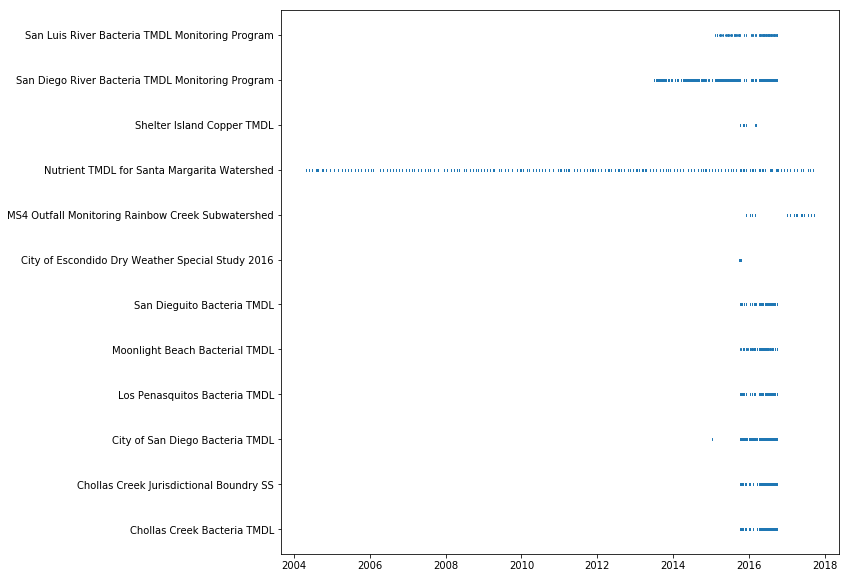

In [73]:
event_time_plot(df, 'Project')

And a more detailed coverage per station. 

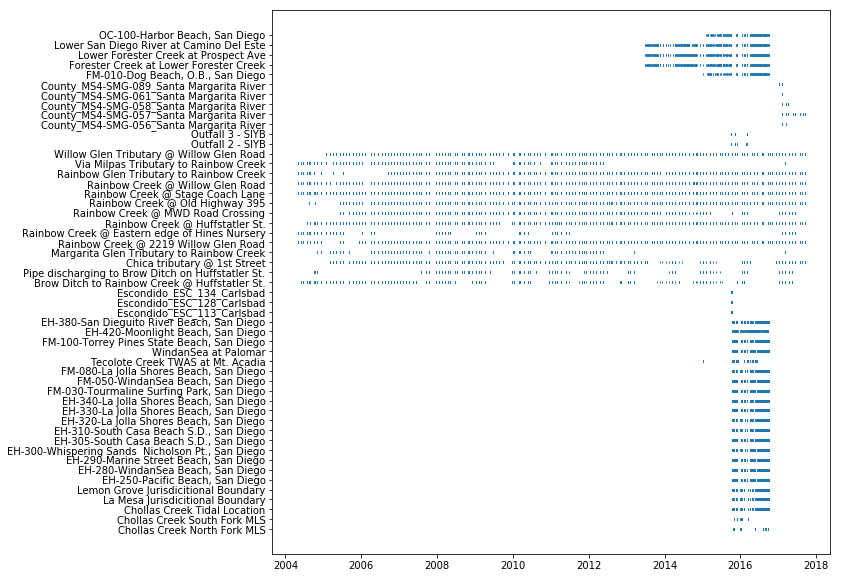

In [66]:
event_time_plot(df)

Here is what just the Beaches and Creeks Bacteria TDML records look like. 

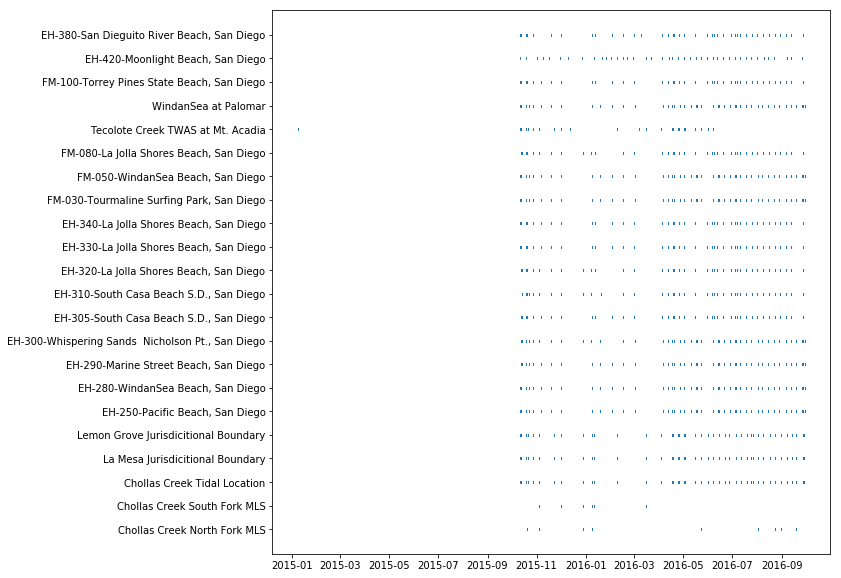

In [79]:
bac = df[df.ParentProject == 'Bacteria TMDL 20 Beaches and Creeks'].copy()
station_time_plot(bac)

In [80]:
bac.SampleDate.min(), bac.SampleDate.max()

(Timestamp('2015-01-08 00:00:00'), Timestamp('2016-09-30 00:00:00'))

In [81]:
bac.Analyte.value_counts()

Temperature                           902
pH                                    902
SpecificConductivity, Not Recorded    901
Turbidity, Total                      901
Enterococcus                          853
Coliform, Fecal                       853
Coliform, Total                       853
Oxygen, Dissolved, Not Recorded       745
E. coli                               166
Name: Analyte, dtype: int64

In [86]:
bac['SampleDays'] = (bac.SampleDate - bac.SampleDate.min()).dt.days


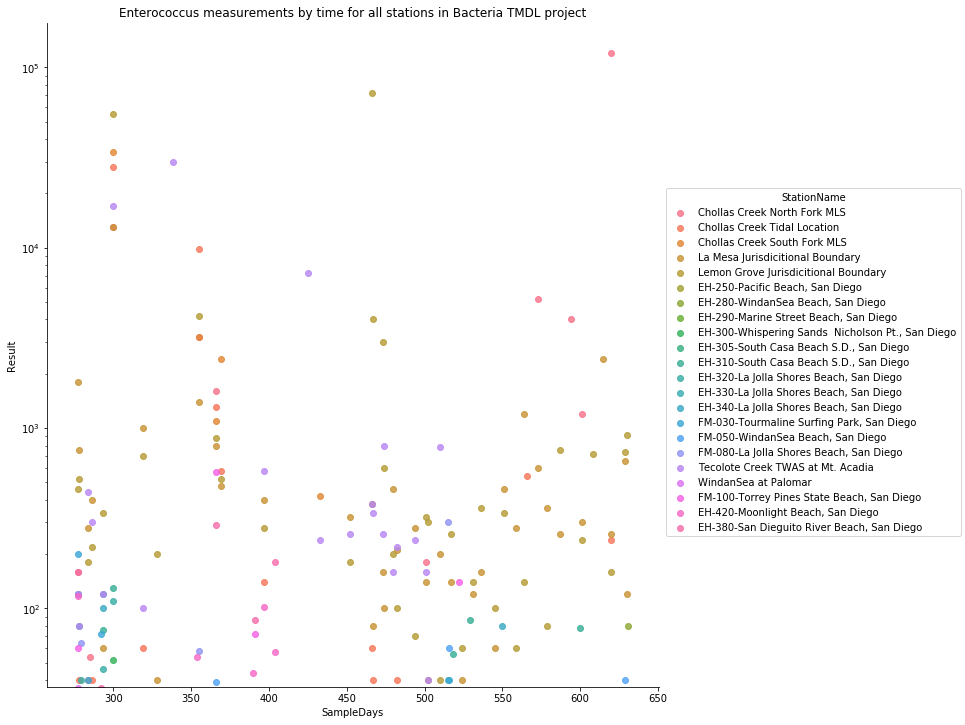

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt 

g = sns.lmplot('SampleDays', 'Result',  data=bac[bac.Analyte == 'Enterococcus'], 
           hue='StationName', fit_reg=False, size=10)

g.set( yscale="log")

ax = plt.gca()
ax.set_title("Enterococcus measurements by time for all stations in Bacteria TMDL project")

plt.show()
